In [1]:
import pandas as pd
import os 
import altair as alt
import numpy as np
from scipy import stats
from sklearn import linear_model 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats import shapiro

In [2]:
datapath = "C:\\Users\\awyat049\\OneDrive\\Documents\\Coding\\test"
os.chdir(datapath)

In [3]:
all_data = pd.read_csv('all_data_sent_date_topic_score_cols.csv')

# concatenations for reference (by topic column contents)

interest_rate_home
- interest_rate_home
- interest_rate_housing

'Rise in Housing Price'
- rising_price_home
- rising_price_housing
- rising_prices_home
- rising_prices_housing
- increase_price_home
- increase_prices_home
- increase_price_housing
- increase_prices_housing

'Rise in Prices'
- rising_prices
- increase_of_prices


In [4]:
# create dataset grouped by date
unique_topics = all_data['topic'].unique()

In [5]:
# split by topic
df_array = [0]* len(unique_topics)

for i in range(0,len(unique_topics)):
    df_array[i] = all_data[all_data['topic'] == unique_topics[i]]

In [6]:
# make sure to compound by day perhaps, enough datapoints but not too much space??

def compound_dat(df):
    return df.groupby('date').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index().copy()

In [7]:
all_date = []

for i in df_array:
    all_date.append(compound_dat(i))

In [8]:
all_date = pd.concat(all_date)

In [9]:
all_date.to_csv("all_data_group_by_day.csv", index = False, encoding='utf-8-sig')

In [10]:
# split by topic and check which dates are in all sets
unique_topics = all_date['topic'].unique()

In [11]:
# split by topic
df_array = [0]* len(unique_topics)

for i in range(0,len(unique_topics)):
    df_array[i] = all_data[all_data['topic'] == unique_topics[i]]

In [12]:
uniques = [0]*len(unique_topics)

for i in range(0,len(uniques)):
    uniques[i] = df_array[i].date.unique()

In [13]:
# find all elements that appear in all lists

appear_all = uniques[0]

for i in range(1,len(uniques)):
    appear_all = set(appear_all) & set(uniques[i])
    
len(appear_all)

410

In [14]:
# a ton of dates are lost, every set itself has at least twice as many dates - we reduce to terms with at least 2000 days

In [15]:
unique_2000_dates = []

for i in df_array:
    if len(i['date'].unique()) > 2000:
        unique_2000_dates.append(i)

In [16]:
uniques_2000 = [0]*len(unique_2000_dates)

for i in range(0,len(uniques_2000)):
    uniques_2000[i] = unique_2000_dates[i].date.unique()

In [17]:
outpath = "C:\\Users\\awyat049\\OneDrive\\Documents\\Coding\\test\\data_subsets"
os.chdir(outpath)

In [18]:
unique_2000_dates_csv = pd.concat(unique_2000_dates)

In [19]:
unique_2000_dates_csv.to_csv("threecat_terms_ovr2000dates.csv", index = False, encoding='utf-8-sig')

# Start of analysis - correlation then tSNE then PCA

In [20]:
outpath = "C:\\Users\\awyat049\\OneDrive\\Documents\\Coding\\test\\data_subsets"
os.chdir(outpath)
unique_2000_dates = pd.read_csv('threecat_terms_ovr2000dates.csv')

In [21]:
unique_topics = unique_2000_dates['topic'].unique()

In [22]:
unique_2000_dates_array = [0]* len(unique_topics)

for i in range(0,len(unique_topics)):
    unique_2000_dates_array[i] = unique_2000_dates[unique_2000_dates['topic'] == unique_topics[i]]

    #lengths checked and got all tweets

In [23]:
def create_grouped_df(df_array): #this is for grouping by date
    final_array = []
    
    for i in df_array:
        final_array.append(i.groupby('date').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index())
    
    return pd.concat(final_array)

In [24]:
date_grouped = create_grouped_df(unique_2000_dates_array)

In [25]:
date_grouped = date_grouped.reset_index()
date_grouped = date_grouped.drop(columns = ['index'])

In [26]:
def separate_by_topic(df):
    unique_topics = df['topic'].unique()
    sep_arr = [0]* len(unique_topics)

    for i in range(0,len(unique_topics)):
        sep_arr[i] = df[df['topic'] == unique_topics[i]]
        
    return sep_arr

In [27]:
all_col_pca = unique_2000_dates[(unique_2000_dates['topic']!='standard_of_living') & (unique_2000_dates['topic']!= 'Rise in Housing Price') & (unique_2000_dates['topic']!='social_assistance')].copy()

In [28]:
all_col_pca = all_col_pca.reset_index()
all_col_pca = all_col_pca.drop(columns = 'index')

In [29]:
all_col_pca = separate_by_topic(all_col_pca)

In [30]:
all_col_pca_grouped = create_grouped_df(all_col_pca)
all_col_pca_grouped = all_col_pca_grouped.reset_index()
all_col_pca_grouped = all_col_pca_grouped.drop(columns = ['index'])

In [31]:
np_arrays = separate_by_topic(all_col_pca_grouped)

In [32]:
# to make all only same days
uniques = [0]*len(np_arrays)

for i in range(0,len(np_arrays)): #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    uniques[i] = np_arrays[i].date.unique()

In [33]:
appear_all = uniques[0] #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED

for i in range(0,len(uniques)): # -- CHANGE ONCE INFLATION ADDED
    appear_all = set(appear_all) & set(uniques[i])

In [34]:
def make_same_dates(df_array, dates):
    equal_arrays = []
    for i in df_array:
        equal_arrays.append(i[i['date'].isin(dates)])
    
    return equal_arrays      

In [35]:
np_arrays_equal = make_same_dates(np_arrays, appear_all)

In [36]:
for i in range(0,len(np_arrays_equal)):
    np_arrays_equal[i] = np_arrays_equal[i].reset_index()
    np_arrays_equal[i] = np_arrays_equal[i].drop(columns = ['index'])

In [37]:
all_np = []

for i in range(0,len(np_arrays_equal)):
    curr_df = np_arrays_equal[i]
    all_np.append([(np.array(((curr_df)['compound_score']).values.tolist()))])

In [38]:
X = np.concatenate(all_np, axis = 0)

In [39]:
for i in range(0,len(np_arrays_equal)):
    np_arrays_equal[i] = np_arrays_equal[i].reset_index()
    np_arrays_equal[i] = np_arrays_equal[i].drop(columns = ['index'])


In [40]:
# only rise in house prices as y value

std_live = unique_2000_dates[(unique_2000_dates['topic']=='standard_of_living')].copy()
rise_house = unique_2000_dates[(unique_2000_dates['topic']== 'Rise in Housing Price')].copy()
soc_assist = unique_2000_dates[(unique_2000_dates['topic']=='social_assistance')].copy()

In [41]:
std_live_group = std_live.groupby('date').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rise_house_group = rise_house.groupby('date').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
soc_assist_group = soc_assist.groupby('date').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [42]:
all_former_y = make_same_dates([soc_assist_group,std_live_group,rise_house_group], appear_all)

In [43]:
def rename_compound_score(df_array):
    new_array = []
    new_name=''
    for i in range(0,len(df_array)):
        curr_df = df_array[i].copy()
        if curr_df.iloc[0]['topic'] == 'Rise in Prices':
            new_name = 'compound_score_rise_in_prices'
        elif curr_df.iloc[0]['topic'] == 'Rise in Housing Price':
            new_name = 'compound_score_rise_in_housing_price'
        else:
            new_name = 'compound_score_' + str(curr_df.iloc[0]['topic'])
        i_new = (curr_df).rename(columns={'compound_score': new_name})
        new_array.append(i_new)
    
    return new_array

In [44]:
renamed_old_y = rename_compound_score(all_former_y)

In [45]:
for i in range(0,len(renamed_old_y)):
    renamed_old_y[i] = renamed_old_y[i].reset_index()
    renamed_old_y[i] = renamed_old_y[i].drop(columns = 'index')

In [46]:
to_join_xval = rename_compound_score(np_arrays_equal)

In [47]:
x_df = to_join_xval[0]
for i in range(1,len(to_join_xval)):
    x_df = pd.concat([x_df, (to_join_xval[i]).iloc[:,1]], axis = 1)

In [48]:
x_df = x_df.drop(columns = 'topic')

In [49]:
full_df_risehouse_y = x_df.copy()
for i in range(0,len(renamed_old_y)):
    full_df_risehouse_y = pd.concat([full_df_risehouse_y, (renamed_old_y[i]).iloc[:,1]], axis = 1)

In [50]:
all_var_for_corr_risehouse = full_df_risehouse_y.drop(columns=['date'])

In [51]:
def rename_cols(df):
    new_name=''
    cols = list(df.columns)
    for i in range(0,len(df.iloc[0])):
        new_name = cols[i].replace("compound_score_","")
        new_name = new_name.replace("_", " ")
        
        df = df.rename(columns={cols[i]: new_name})
    
    return df

In [52]:
all_var_for_corr_risehouse1 = rename_cols(all_var_for_corr_risehouse)

In [53]:
all_var_for_corr_risehouse1

,affordable housing,cost of living,Foreign Buyer,foreign home buyer,foreign investors,Generational Wealth,home owner,housing crisis,housing market,inflation,interest rate home,low income housing,minimum wage,rental market,rise in prices,social assistance,standard of living,rise in housing price
0,0.043005,0.035993,0.054430,0.000000,0.057400,0.429671,0.103821,-0.493062,0.144156,-0.051981,0.661933,-0.041572,0.070527,0.102804,-0.015626,0.270600,0.224898,0.220913
1,0.085407,0.037602,-0.014779,-0.116420,-0.029538,0.589185,0.097222,-0.555517,0.117638,-0.019129,0.353757,0.135226,0.058222,0.094169,0.301488,0.178459,0.205325,0.083791
2,0.160405,0.056640,0.274616,-0.023608,0.096493,0.388800,0.127251,-0.511702,0.127400,0.008561,0.541288,-0.047827,0.073104,0.067318,0.160817,0.230326,0.172048,0.067696
3,0.152428,0.081799,0.262200,-0.019993,0.184091,0.449207,0.125950,-0.566239,0.053802,0.035670,0.346740,-0.059647,0.051114,0.052573,-0.092152,0.229124,0.174089,0.064077
4,0.128830,0.064644,0.075604,0.041171,0.131893,0.469389,0.140325,-0.547807,0.107209,0.042700,0.401621,-0.045458,0.052225,0.089343,0.063712,0.142806,0.195386,0.068551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0.137129,-0.171129,0.142245,0.130743,0.095347,0.507132,0.158546,-0.506733,-0.023914,-0.090665,0.401373,-0.090363,0.042704,0.079113,0.041718,0.453812,0.144465,0.142982
2045,0.111702,-0.126008,0.075856,-0.796400,0.099375,0.509824,0.111482,-0.502212,-0.009394,-0.083157,0.364747,-0.068743,0.018419,0.093053,0.065773,0.359669,0.081985,0.065033
2046,0.132142,-0.111672,0.181130,0.228700,0.051371,0.494926,0.116736,-0.468115,-0.006343,-0.064871,0.346034,-0.031164,0.072305,0.122654,0.065328,0.406914,0.131694,0.121885
2047,0.152738,-0.030294,0.031893,0.106616,0.052971,0.460502,0.114328,-0.497108,-0.037463,-0.059348,0.397814,-0.018050,0.054601,0.121357,0.093732,0.391161,0.112201,0.242091


# Correlation Start

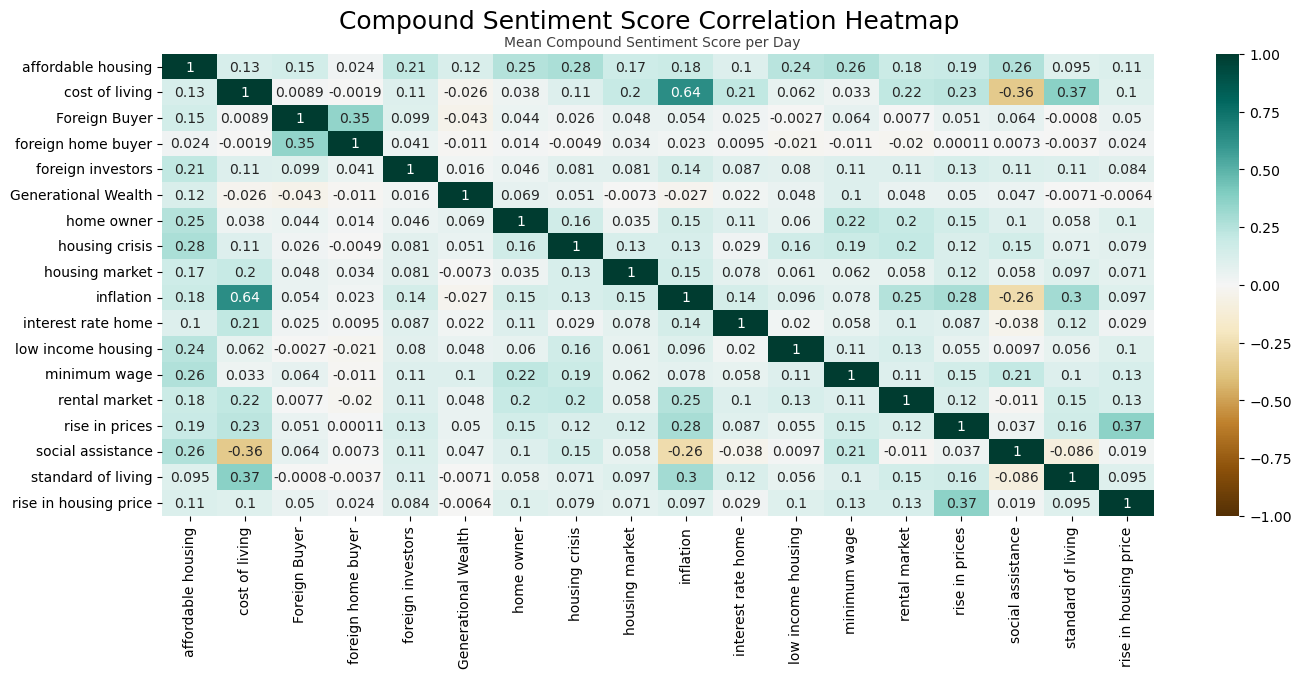

In [54]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(all_var_for_corr_risehouse1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.text(x=3.2, y=-1,s='Compound Sentiment Score Correlation Heatmap', fontsize=18, alpha=1);
heatmap.text(x=6.2, y=-0.3, s='Mean Compound Sentiment Score per Day', fontsize=10, alpha=0.75);
#plt.show()

In [55]:
corr = all_var_for_corr_risehouse1.corr()

In [56]:
#mean rise in house prices correlation
np.append(corr.values[17][0:14],corr.values[17][15:17]).mean()

0.07545953822312591

In [57]:
#mean rise in prices correlation
np.append(corr.values[14][0:14], corr.values[14][15:17]).mean()

0.12142615042417211

# tSNE Start

In [58]:
date_grouped = create_grouped_df(unique_2000_dates_array)

In [59]:
date_grouped = date_grouped.reset_index()
date_grouped = date_grouped.drop(columns = ['index'])

In [60]:
np_arrays = separate_by_topic(date_grouped)

In [61]:
# to make all only same days
uniques = [0]*len(np_arrays)

for i in range(0,len(np_arrays)): #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    uniques[i] = np_arrays[i].date.unique()

In [62]:
appear_all = uniques[0] #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED

for i in range(0,len(uniques)): # -- CHANGE ONCE INFLATION ADDED
    appear_all = set(appear_all) & set(uniques[i])

In [63]:
np_arrays_equal = make_same_dates(np_arrays, appear_all)

In [64]:
df_topics = []

for i in range(0,len(np_arrays_equal)):
    df_topics.append(np_arrays_equal[i].topic.unique())



In [65]:
df_topics = np.concatenate(df_topics)

In [66]:
all_np = []

for i in range(0,len(np_arrays_equal)):
    curr_df = np_arrays_equal[i]
    all_np.append([(np.array(((curr_df)['compound_score']).values.tolist()))])

In [67]:
X = np.concatenate(all_np, axis = 0)

In [68]:
def run_tsne_on_tsnedf(X, perplexity_c):
    tsne = TSNE(n_components = 2, perplexity = perplexity_c)
    X_tsne = tsne.fit_transform(X)
    df = pd.DataFrame(X_tsne, columns=['z1','z2'])
    
    return df

In [69]:
# Perplexity = 1
# Click on elements in legend to highlight point on graph!
df_tsne4 = run_tsne_on_tsnedf(X, 1)

df_topics = []

for i in range(0,len(np_arrays_equal)):
    df_topics.append(np_arrays_equal[i].topic.unique())
    
df_topics = np.concatenate(df_topics)

df_tsne4['topic'] = df_topics

alt.data_transformers.disable_max_rows()
selection = alt.selection_multi(fields=['topic'], bind='legend')

alt.Chart(df_tsne4).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('topic:N', title = 'Term', scale=alt.Scale(scheme='tableau20')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
).interactive()

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


alt.Chart(...)

In [70]:
# Perplexity = 2
# Click on elements in legend to highlight point on graph!
df_tsne4 = run_tsne_on_tsnedf(X, 2)

df_topics = []

for i in range(0,len(np_arrays_equal)):
    df_topics.append(np_arrays_equal[i].topic.unique())
    
df_topics = np.concatenate(df_topics)

df_tsne4['topic'] = df_topics

alt.data_transformers.disable_max_rows()
selection = alt.selection_multi(fields=['topic'], bind='legend')

alt.Chart(df_tsne4).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('topic:N', title = 'Term', scale=alt.Scale(scheme='tableau20')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
).interactive()

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


alt.Chart(...)

In [71]:
# Perplexity = 0.75 -- MODEL INCLUDED IN REPORT
# Click on elements in legend to highlight point on graph!
df_tsne4 = run_tsne_on_tsnedf(X, 0.75)

df_topics = []

for i in range(0,len(np_arrays_equal)):
    df_topics.append(np_arrays_equal[i].topic.unique())
    
df_topics = np.concatenate(df_topics)

df_tsne4['topic'] = df_topics

alt.data_transformers.disable_max_rows()
selection = alt.selection_multi(fields=['topic'], bind='legend')

alt.Chart(df_tsne4).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('topic:N', title = 'Term', scale=alt.Scale(scheme='tableau20')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
).interactive()

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


alt.Chart(...)

# Start of PCA Regression

In [72]:
# rise in house price PCA model
X_train, X_test, y_train, y_test = train_test_split(all_var_for_corr_risehouse1.iloc[:,0:17],all_var_for_corr_risehouse1.iloc[:,17], test_size=0.2)

In [73]:
K = 17
scaler = StandardScaler().fit(X_train)
X_train_st =  scaler.transform(X_train)
X_test_st =  scaler.transform(X_test)

pca = PCA(n_components=K).fit(X_train_st)
Z_train = pca.transform(X_train_st)
Z_test = pca.transform(X_test_st)

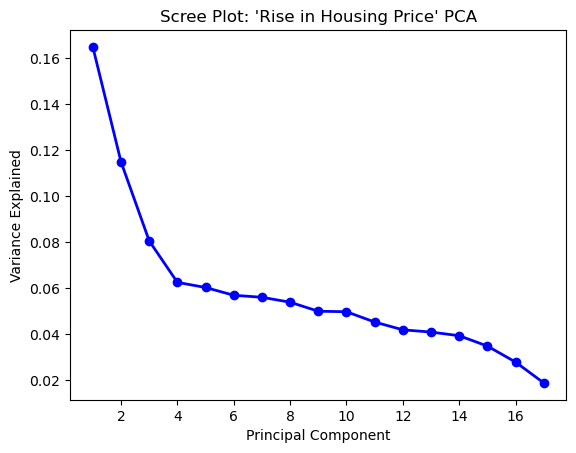

In [74]:
PC_indices = np.arange(K) + 1
plt.plot(PC_indices, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot: 'Rise in Housing Price' PCA")
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [75]:
rise_in_prices_x = pd.concat((all_var_for_corr_risehouse1.iloc[:,0:14], all_var_for_corr_risehouse1.iloc[:,15:18]), axis = 1)

In [76]:
# rise in prices PCA model
X_train, X_test, y_train, y_test = train_test_split(rise_in_prices_x,all_var_for_corr_risehouse1.iloc[:,14], test_size=0.2)

In [77]:
K = 17
scaler = StandardScaler().fit(X_train)
X_train_st =  scaler.transform(X_train)
X_test_st =  scaler.transform(X_test)

pca = PCA(n_components=K).fit(X_train_st)
Z_train = pca.transform(X_train_st)
Z_test = pca.transform(X_test_st)

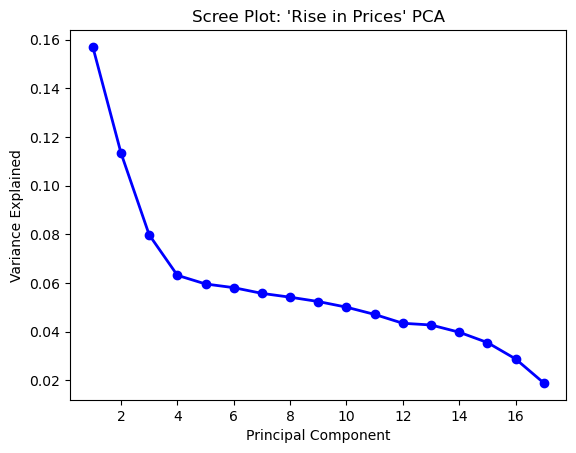

In [78]:
PC_indices = np.arange(K) + 1
plt.plot(PC_indices, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot: 'Rise in Prices' PCA")
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [79]:
rise_house_y = all_var_for_corr_risehouse1.iloc[:,17]
rise_price_y = all_var_for_corr_risehouse1.iloc[:,14]

In [80]:
# number of positive sentiment entries 'rise in housing price'
count = 0
for i in rise_house_y:
    if i > 0.05:
        count +=1

count/len(rise_house_y)

0.9546120058565154

In [81]:
# number of positive sentiment entries 'rise in prices'

count = 0
for i in rise_price_y:
    if i > 0.05:
        count +=1

count/len(rise_price_y)

0.7667154709614447

In [82]:
#check accuracy - accurate is taken to mean within 0.05 sentiment

def accuracy_check2(pred_det, y):
    
    count = 0
    for i in range(0,len(y)):
        if abs(pred_det[i] - y.iloc[i]) <=0.05:
            count += 1
    
    return count / len(y)

In [83]:
# Rise in housing price model - 1000 iterations to calculate accuracy

full_mod_pred = [0]*1000
part_mod_pred = [0]*1000

for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(all_var_for_corr_risehouse1.iloc[:,0:17],all_var_for_corr_risehouse1.iloc[:,17], test_size=0.2)
    K = 17
    scaler = StandardScaler().fit(X_train)
    X_train_st =  scaler.transform(X_train)
    X_test_st =  scaler.transform(X_test)

    pca = PCA(n_components=K).fit(X_train_st)
    Z_train = pca.transform(X_train_st)
    Z_test = pca.transform(X_test_st)
    # ALL PC
    # regression model
    regr_PCA = linear_model.LinearRegression()
    regr_PCA.fit(Z_train, y_train)
    pred_det_PCA = regr_PCA.predict(Z_test)
    full_mod_pred[i] = accuracy_check2(pred_det_PCA, y_test)
    # PC 1 2 3 4
    # regression model
    regr_PCA = linear_model.LinearRegression()
    regr_PCA.fit(Z_train[:,[0,1,2,3]], y_train)
    pred_det_PCA = regr_PCA.predict(Z_test[:,[0,1,2,3]])
    part_mod_pred[i] = accuracy_check2(pred_det_PCA, y_test)
    
print("Rise in housing mean full model: " + str(sum(full_mod_pred)/len(full_mod_pred)) + "Rise in housing mean part model: " + str(sum(part_mod_pred)/len(part_mod_pred)))

Rise in housing mean full model: 0.4556878048780483Rise in housing mean part model: 0.44542926829268265


In [84]:
# Rise in prices model - 1000 iterations to calculate accuracy

full_mod_pred = [0]*1000
part_mod_pred = [0]*1000

for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(rise_in_prices_x,all_var_for_corr_risehouse1.iloc[:,14], test_size=0.2)
    K = 17
    scaler = StandardScaler().fit(X_train)
    X_train_st =  scaler.transform(X_train)
    X_test_st =  scaler.transform(X_test)

    pca = PCA(n_components=K).fit(X_train_st)
    Z_train = pca.transform(X_train_st)
    Z_test = pca.transform(X_test_st)
    # regression to predict 'rise in prices'
    # ALL PC
    # regression model
    regr_PCA = linear_model.LinearRegression()
    regr_PCA.fit(Z_train, y_train)
    pred_det_PCA = regr_PCA.predict(Z_test)
    full_mod_pred[i] = accuracy_check2(pred_det_PCA, y_test)
    # PC 1 2 3 4
    # regression model
    regr_PCA = linear_model.LinearRegression()
    regr_PCA.fit(Z_train[:,[0,1,2,3]], y_train)
    pred_det_PCA = regr_PCA.predict(Z_test[:,[0,1,2,3]])
    part_mod_pred[i] = accuracy_check2(pred_det_PCA, y_test)

print("Rise in Prices mean full model: " + str(sum(full_mod_pred)/len(full_mod_pred)) + "Rise in Prices mean part model: " + str(sum(part_mod_pred)/len(part_mod_pred)))

Rise in Prices mean full model: 0.6910121951219522Rise in Prices mean part model: 0.6739317073170712
